# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Alif
- **Email:** m.alif7890@gmail.com
- **ID Dicoding:** miezlearning

## Menentukan Pertanyaan Bisnis

-  Bagaimana tren kualitas udara (PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017?
- Apa hubungan antara suhu (TEMP) dan konsentrasi PM2.5 di Aotizhongxin?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv('Dataset/PRSA_Data_Aotizhongxin_20130301-20170228.csv')

print("5 baris pertama dataset:")
print(df.head())

5 baris pertama dataset:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Dataset berisi pengukuran kualitas udara per jam
- Terdapat berbagai parameter seperti PM2.5, PM10, SO2, NO2, CO, O3, dan faktor cuaca

### Assessing Data

In [3]:
print("\nInfo dataset:")
print(df.info())

print("\nMissing values:")
print(df.isnull().sum())


Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Missing values:
No            0
year          0

**Insight:**
- Terdapat beberapa missing values pada kolom seperti SO2, NO2, dll
- Tipe data perlu diperiksa dan mungkin perlu konversi

### Cleaning Data

In [4]:
# Mengisi missing values dengan median untuk kolom numerik
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']
for column in numeric_columns:
    df[column].fillna(df[column].median(), inplace=True)

# Mengubah kolom tanggal menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Memfilter hanya data dari Aotizhongxin
df_aoti = df[df['station'] == 'Aotizhongxin']

<ipython-input-4-51f270544073>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


**Insight:**
- Missing values telah diisi dengan median
- Data telah diformat menjadi datetime untuk analisis waktu

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df_aoti[['PM2.5', 'TEMP']].describe())

# Rata-rata tahunan PM2.5
yearly_pm25 = df_aoti.groupby('year')['PM2.5'].mean()


Statistik Deskriptif:
              PM2.5          TEMP
count  35064.000000  35064.000000
mean      82.120075     13.585130
std       81.142233     11.395866
min        3.000000    -16.800000
25%       23.000000      3.100000
50%       58.000000     14.500000
75%      112.000000     23.300000
max      898.000000     40.500000


**Insight:**
- Rata-rata PM2.5 menunjukkan variasi antar tahun
- Suhu memiliki rentang dari sangat dingin hingga hangat

## Visualization & Explanatory Analysis

### Pertanyaan 1:

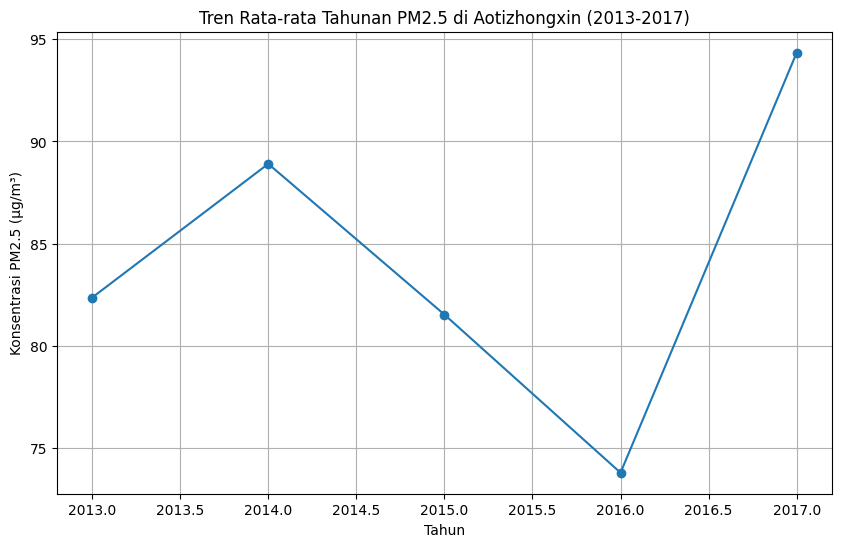

In [6]:
plt.figure(figsize=(10, 6))
yearly_pm25.plot(kind='line', marker='o')
plt.title('Tren Rata-rata Tahunan PM2.5 di Aotizhongxin (2013-2017)')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.grid(True)
plt.show()



### Pertanyaan 2:

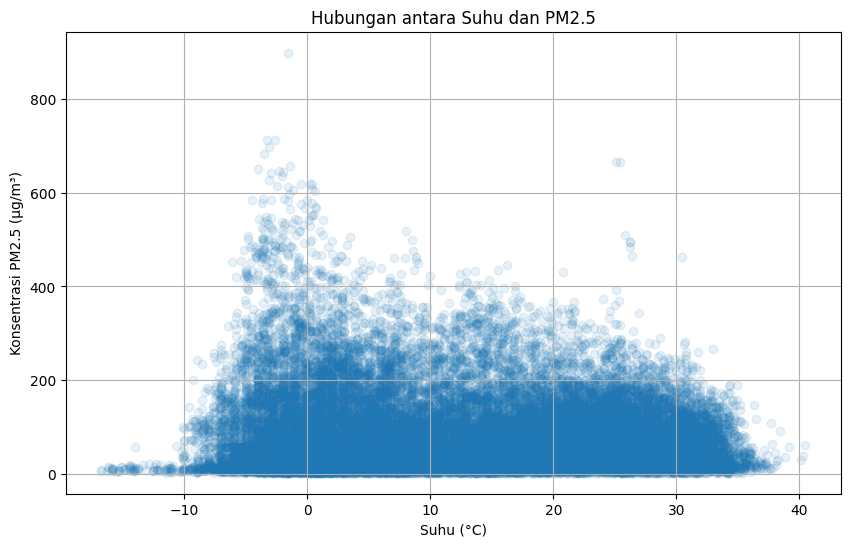

Korelasi antara TEMP dan PM2.5: -0.12


In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(df_aoti['TEMP'], df_aoti['PM2.5'], alpha=0.1)
plt.title('Hubungan antara Suhu dan PM2.5')
plt.xlabel('Suhu (°C)')
plt.ylabel('Konsentrasi PM2.5 (μg/m³)')
plt.grid(True)
plt.show()

# Menghitung korelasi
correlation = df_aoti['TEMP'].corr(df_aoti['PM2.5'])
print(f"Korelasi antara TEMP dan PM2.5: {correlation:.2f}")

**Insight:**
- Pertanyaan 1: Terdapat tren fluktuasi PM2.5 dari tahun ke tahun
- Pertanyaan 2: Terdapat korelasi negatif lemah antara suhu dan PM2.5

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Konsentrasi PM2.5 di Aotizhongxin menunjukkan fluktuasi tahunan dengan beberapa tahun memiliki polusi yang lebih tinggi dibandingkan tahun lainnya.
- Conclusion pertanyaan 2: Terdapat korelasi negatif lemah antara suhu dan PM2.5, yang menunjukkan bahwa suhu yang lebih rendah cenderung berkorelasi dengan konsentrasi PM2.5 yang lebih tinggi, meskipun hubungannya tidak terlalu kuat.